<a href="https://colab.research.google.com/github/oilnutttt/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.datasets import load_digits

In [22]:
import matplotlib.pyplot as plt

In [23]:
# Load digits dataset
digits = load_digits()

In [24]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

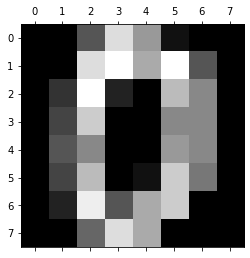

In [25]:
plt.gray()
plt.matshow(digits.images[0])

8


<Figure size 432x288 with 0 Axes>

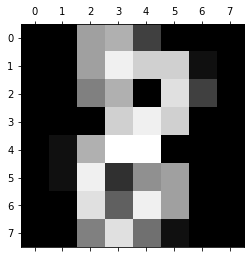

In [26]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz 3 march
- แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ random_state = 9
- หา parameters ที่ดีที่สุด (K (1,3,5) ) Distance_weighted (yes/no) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด  กับ test_data

In [27]:
# Scale the feature values
scaler = StandardScaler()
X = scaler.fit_transform(digits.data)

In [28]:
# Split the dataset into training and testing sets with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=9)

# Scale the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Create a KNN classifier with k=5 and distance-weighted option
knn_distance1 = KNeighborsClassifier(n_neighbors=1, weights='distance')

# Create a KNN classifier with k=5 and non-weighted option (default)
knn_non_distance1 = KNeighborsClassifier(n_neighbors=1)

# Fit the distance-weighted KNN classifier on the training set and predict on the test set
knn_distance1.fit(X_train, y_train)
y_pred_distance = knn_distance1.predict(X_test)

# Fit the non-weighted KNN classifier on the training set and predict on the test set
knn_non_distance1.fit(X_train, y_train)
y_pred_non_distance = knn_non_distance1.predict(X_test)

# Compute the accuracies of the distance-weighted and non-weighted KNN classifiers on the test set
accuracy_distance = accuracy_score(y_test, y_pred_distance)
accuracy_non_distance = accuracy_score(y_test, y_pred_non_distance)

# Print the accuracies
print("Accuracy with distance-weighted KNN:", accuracy_distance)
print("Accuracy with non-weighted KNN:", accuracy_non_distance)

Accuracy with distance-weighted KNN: 0.9694444444444444
Accuracy with non-weighted KNN: 0.9694444444444444


In [30]:
# Create a KNN classifier with k=5 and distance-weighted option
knn_distance3 = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Create a KNN classifier with k=5 and non-weighted option (default)
knn_non_distance3 = KNeighborsClassifier(n_neighbors=3)

In [31]:
# Create a KNN classifier with k=5
knn5 = KNeighborsClassifier(n_neighbors=5,weights='distance')

In [32]:
from sklearn.model_selection import cross_val_score, KFold

In [33]:
# Create a 10-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=9)

In [34]:
# Compute the cross-validation scores
scores = cross_val_score(knn1, X, digits.target, cv=kf)

# Print the mean score and standard deviation of the scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.98333333 0.96111111 0.98333333 0.96666667 0.96111111 0.97777778
 0.97777778 0.97765363 0.97206704 0.97765363]
Mean score: 0.9738485412787089
Standard deviation: 0.007867624209147535


In [35]:
# Compute the cross-validation scores
scores = cross_val_score(knn3, X, digits.target, cv=kf)

# Print the mean score and standard deviation of the scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.97777778 0.96666667 0.98333333 0.97222222 0.97222222 0.97222222
 0.98888889 0.98324022 0.97765363 0.98324022]
Mean score: 0.9777467411545624
Standard deviation: 0.0065578409232404655


In [36]:
# Compute the cross-validation scores
scores = cross_val_score(knn5, X, digits.target, cv=kf)

# Print the mean score and standard deviation of the scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.97222222 0.97222222 0.98333333 0.98333333 0.97222222 0.97777778
 0.98888889 0.98882682 0.97206704 0.98324022]
Mean score: 0.979413407821229
Standard deviation: 0.006599674296279349


parameter ที่ดีที่สุด คือ k=5

In [37]:
# Train the classifier on the training data
knn5.fit(X_train, y_train)

# Predict the classes of the test data
y_pred = knn5.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9722222222222222


In [38]:
from numpy.core.numeric import cross
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: ", scores.mean())

Mean Cross-Validation Score:  0.9728632478632478


## model selection

In [40]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9728632478632478
Mean Cross-Validation Score: K3weighted 0.9749465811965811
Mean Cross-Validation Score: K5weighted 0.9805167055167056
Mean Cross-Validation Score: K1NOweighted 0.9728632478632478
Mean Cross-Validation Score: K3NOweighted 0.9742618492618492
Mean Cross-Validation Score: KNOweighted 0.9791181041181041


## Evaluate with test set

In [41]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


Accuracy score:  0.9722222222222222
